# The Movielens Case Study [Domain - Entertainment]
## Description:
### Background of Problem Statement :
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

### Problem Objective :
Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Objective 1: Importing datasets
movies_df = pd.read_csv("D:\Simplilearn\Data Science with Python\Sample Project\Data science with Python 1 -MovieLens\movies.dat",sep="::",names=["MovieID","Title","Genres"])
ratings_df = pd.read_csv("D:\Simplilearn\Data Science with Python\Sample Project\Data science with Python 1 -MovieLens\\ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"])
users_df = pd.read_csv("D:\Simplilearn\Data Science with Python\Sample Project\Data science with Python 1 -MovieLens\\users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from 

In [3]:
print(movies_df.shape)
print(ratings_df.shape)
print(users_df.shape)
print("\n")
print(movies_df.describe)
print(ratings_df.describe)
print(users_df.describe)
print("\n")
print(movies_df.isnull().sum())
print(ratings_df.isnull().sum())
users_df.isnull().sum()

(3883, 3)
(1000209, 4)
(6040, 5)


<bound method NDFrame.describe of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy 

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [4]:
#Objective 2: Creating Master Dataset
Master_dataset = pd.merge(movies_df,ratings_df, on="MovieID", how="inner")
Master_dataset.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [5]:
Master_dataset.shape

(1000209, 6)

In [6]:
Master_Data_pre = pd.merge(Master_dataset,users_df, on="UserID", how="inner")
print(Master_Data_pre.shape)
Master_Data_pre.isnull().sum()

(1000209, 10)


MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [7]:
Master_Data = Master_Data_pre.drop(["Zip-code","Timestamp","Genres"],axis=1)

In [8]:
Master_Data.head()
Master_Data.describe()

,MovieID,UserID,Rating,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,5.600000e+01,2.000000e+01


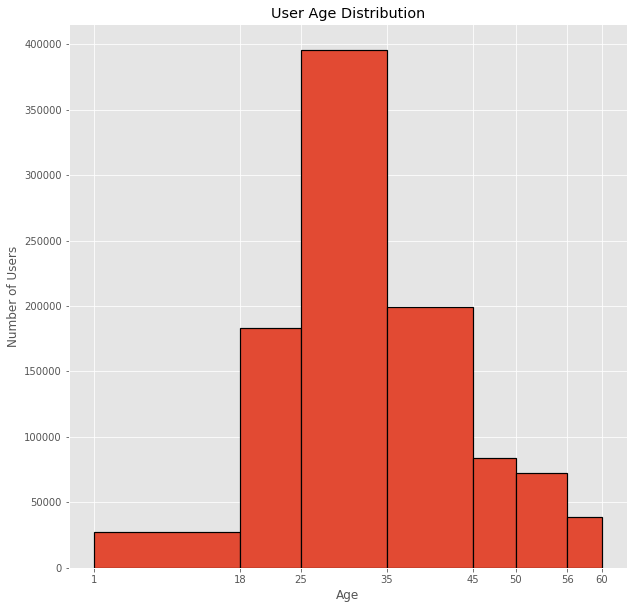

In [9]:
#Objective 3: Exploratory Data Analysis of Master Dataset
#User Age distribution

import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

age_bin = [1,18,25,35,45,50,56,60]

style.use("ggplot")
plt.figure(figsize=(10,10))
plt.hist(Master_Data["Age"],bins=age_bin,edgecolor="black",linewidth=1.2)
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("User Age Distribution")
plt.xticks(ticks=age_bin,labels=age_bin)
plt.show()

In [10]:
user_age_distribution = Master_Data.groupby(["Age"])
user_age_distribution["Age"].count()

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: Age, dtype: int64

#### User Age Distribution - Analysis
As we can observe from the Histogram, maximum number of reviews were given by users of the age group "25-35" consisting of 39.54% and minimum number of users are from the age group "Under 18".

In [11]:
#User rating of the movie “Toy Story”

user_rating = Master_Data[Master_Data["Title"].str.contains("Toy Story") == True]
user_rating_toy_story = user_rating.groupby(["Title","Rating"])
user_rating_toy_story.size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

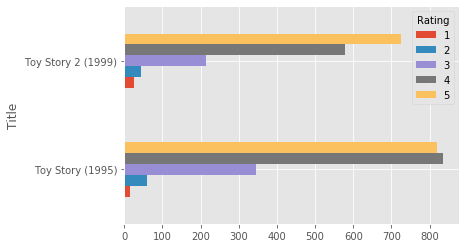

4.146846413095811
4.218927444794953


In [12]:
user_rating_toy_story.size().unstack().plot(kind="barh", stacked=False, legend=True)
plt.show()
print(((5*820)+(4*835)+(3*345)+(2*61)+(16))/(16+61+345+835+820))
print(((5*724)+(4*578)+(3*214)+(2*44)+(25))/(724+578+214+44+25))

#### User Rating of The Movie "Toy Story" - Analysis
As we can observe, Toy Story (1995) is much more watched than Toy Story 2 (1999). But Toy Story 2 (1999) is rated higher than Toy Story (1995), with Average rating of 4.22 and 4.15, respectively.

In [13]:
#Top 25 movies by viewership rating

Top_movie = Master_Data.groupby("Title").size().sort_values(ascending = False)[:25]
Top_movie

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

Text(0.5, 1.0, 'Top 25 Movies by Viewership Rating')

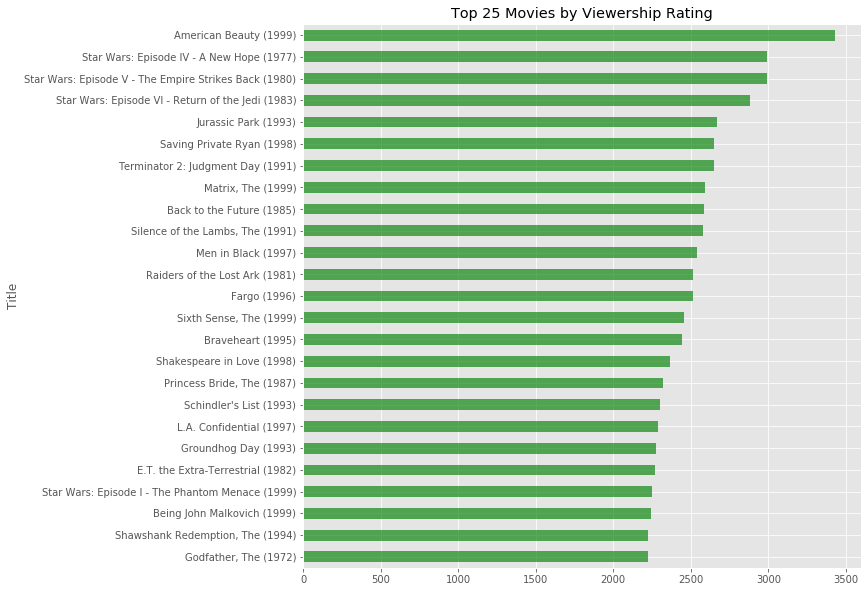

In [14]:
Top_movie.sort_values(ascending=True).plot(kind="barh",alpha=.65,figsize=(10,10),color="green")
plt.title("Top 25 Movies by Viewership Rating")

#### Top 25 Movies by Viewership Rating - Analysis
American Beauty (1999) is the most viewed movie by the users of the chosen dataset with 3428 viewers, while the 25th most viewed movie is The Godfather (1972) with 2223 viewers.

In [15]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

user_id_filter = Master_Data[Master_Data["UserID"] == 2696]
user_id_filter.sort_values("Rating", ascending=False)

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
991036,800,Lone Star (1996),2696,5,M,25,7
991045,1645,"Devil's Advocate, The (1997)",2696,4,M,25,7
991047,1783,Palmetto (1998),2696,4,M,25,7
991037,1092,Basic Instinct (1992),2696,4,M,25,7
991053,3176,"Talented Mr. Ripley, The (1999)",2696,4,M,25,7
991039,1258,"Shining, The (1980)",2696,4,M,25,7
991051,2389,Psycho (1998),2696,4,M,25,7
991049,1892,"Perfect Murder, A (1998)",2696,4,M,25,7
991042,1617,L.A. Confidential (1997),2696,4,M,25,7
991043,1625,"Game, The (1997)",2696,4,M,25,7


#### User ID 2696 Viewership - Analysis
Out of all the 20 movies the user watched, user 2696 didn't like Lake Placid (1999) and JFK (1991) and rated them as 1. On the other hand, the user really liked Lone Star (1996) and rated it 5.

In [16]:
#Objective 4: Feature Engineering
#Find out all the unique genres
Genres_list = Master_Data_pre["Genres"].str.split("|")
Genres_list

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [17]:
genre_set = set()
for g in Genres_list:
    genre_set = genre_set.union(set(g))
genre_set

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [18]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
genre_1hot = Master_Data_pre["Genres"].str.get_dummies("|")

In [19]:
genre_1hot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [20]:
Master_Data_pre = pd.concat([Master_Data_pre,genre_1hot],axis=1)

In [21]:
Master_Data_pre.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [22]:
Master_Data_pre.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [23]:
Master_Data_pre.to_csv("Master_Data.csv")

In [24]:
#Determine the features affecting the ratings of any particular movie.

Master_Data_pre[["title","Year"]] = Master_Data_pre.Title.str.extract("(.)\s\\((.\d+)",expand=True)


In [25]:
Master_Data_pre.drop(columns="title",inplace=True)
Master_Data_pre

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,1,0,0,2000
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,1,0,0,0,0,1,0,0,2000
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,1,0,0,0,0,2000
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,1,0,0,2000


In [26]:
Master_Data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [27]:
Master_Data_pre.Year = Master_Data_pre.Year.astype(int)

In [28]:
Master_Data_pre['Movie_Age'] = 2000 - Master_Data_pre.Year
Master_Data_pre.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [29]:
Master_Data_pre["Gender"] = Master_Data_pre["Gender"].replace(["F","M"],[1,0])

In [30]:
Master_Data_pre.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [31]:
Master_Data_pre.Gender = Master_Data_pre.Gender.astype(int)

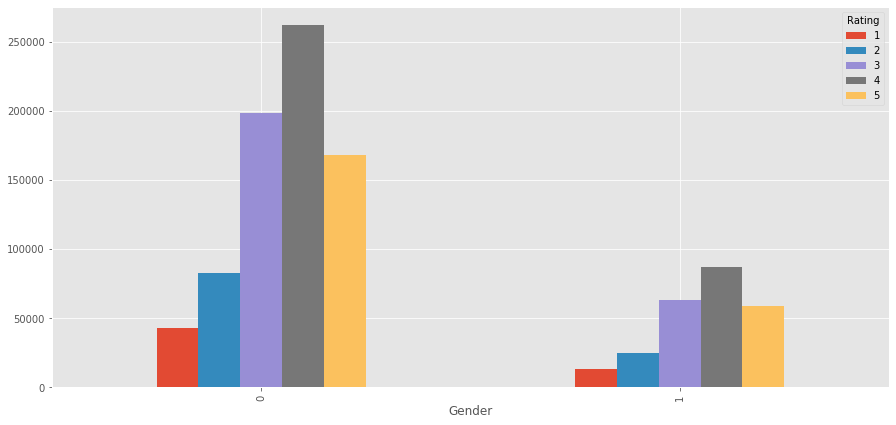

In [32]:
Master_Data_pre.groupby(["Gender","Rating"]).size().unstack().plot(kind="bar",stacked=False,legend=True,figsize=(15,7))
plt.show()

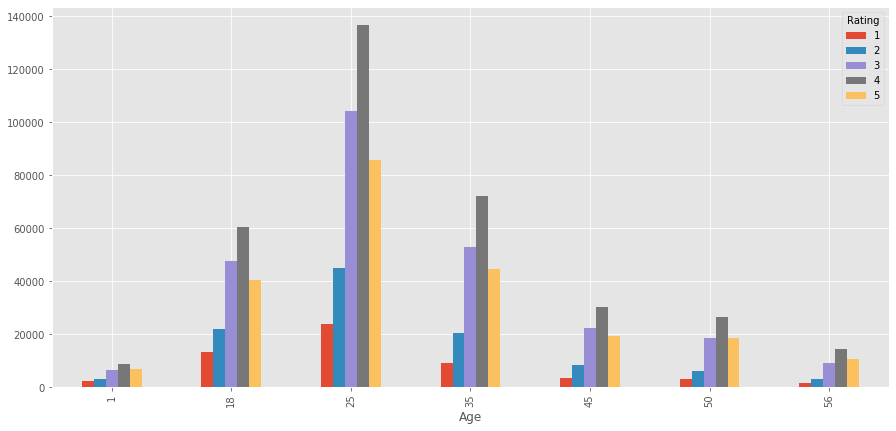

In [33]:
Master_Data_pre.groupby(["Age","Rating"]).size().unstack().plot(kind="bar",stacked=False,legend=True,figsize=(15,7))
plt.show()

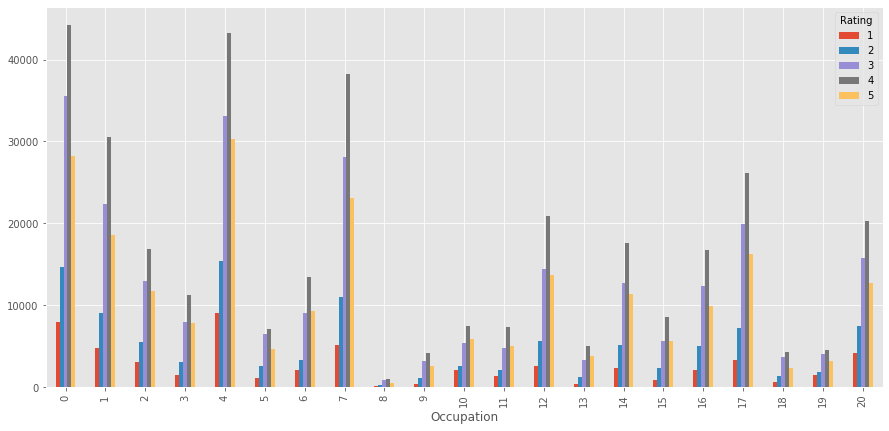

In [34]:
Master_Data_pre.groupby(["Occupation","Rating"]).size().unstack().plot(kind="bar",stacked=False,legend=True,figsize=(15,7))
plt.show()

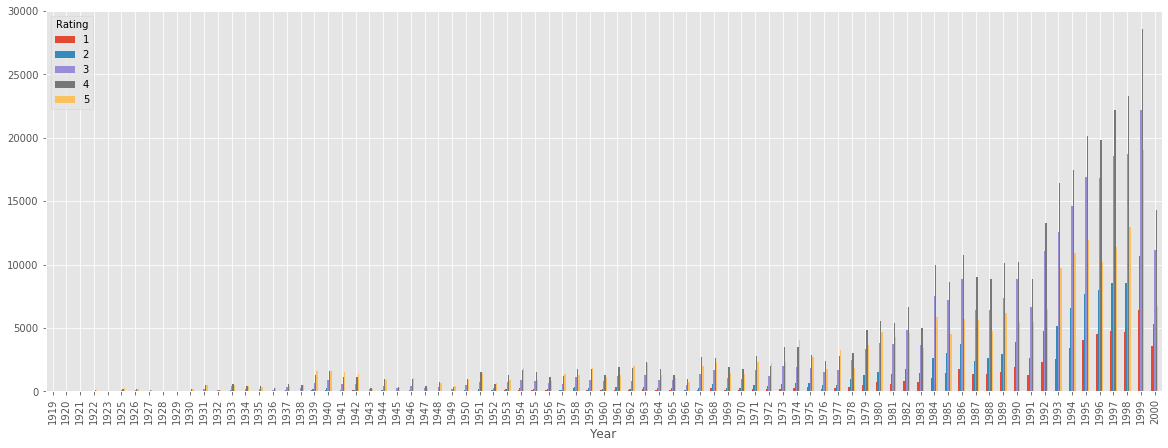

In [35]:
Master_Data_pre.groupby(["Year","Rating"]).size().unstack().plot(kind="bar",stacked=False,legend=True,figsize=(20,7))
plt.show()

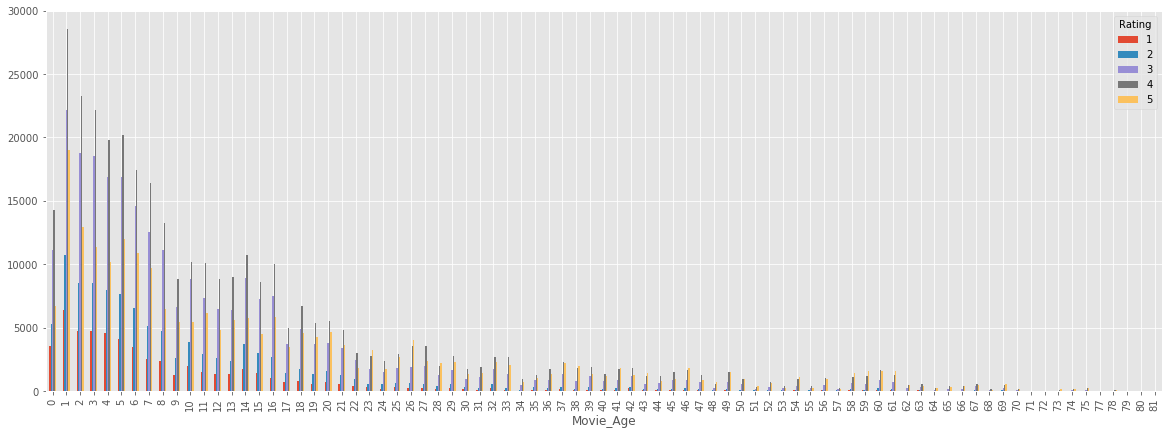

In [36]:
Master_Data_pre.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind="bar",stacked=False,legend=True,figsize=(20,7))
plt.show()

In [37]:
#Develop an appropriate model to predict the movie ratings

x_feature = Master_Data_pre[:30000][["MovieID","Age","Occupation"]].values
y_target = Master_Data_pre[:30000][["Rating"]].values

In [38]:
x_feature

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [ 971,   50,   15],
       [1007,   50,   15],
       [1008,   50,   15]], dtype=int64)

In [39]:
y_target

array([[5],
       [5],
       [5],
       ...,
       [4],
       [3],
       [3]], dtype=int64)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_feature,y_target,test_size=0.3,random_state=42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

y_train

(21000, 3)
(9000, 3)
(21000, 1)
(9000, 1)


array([[5],
       [5],
       [5],
       ...,
       [4],
       [4],
       [5]], dtype=int64)

In [42]:
# Logistic Regression

logreg = LogisticRegression(max_iter=50000, n_jobs=-1)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
acc_log = logreg.score(x_train,y_train)
acc_log = round(acc_log*100,2)
acc_log

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.97

In [45]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
acc_svc = svc.score(x_train,y_train)
acc_svc = round(acc_svc*100,2)
acc_svc

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.04

In [46]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3,n_jobs=-1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train,y_train)*100,2)
acc_knn

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


58.15

In [48]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train,y_train)*100,2)
acc_gaussian

D:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.04

In [51]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train,y_train)*100,2)
acc_linear_svc

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


16.89

In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100,2)
acc_decision_tree

84.7

In [55]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


84.7

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.70
6,Decision Tree,84.70
1,KNN,58.15
0,Support Vector Machines,35.04
4,Naive Bayes,35.04
2,Logistic Regression,34.97
5,Linear SVC,16.89
